<a href="https://colab.research.google.com/github/bttrung/secure-private-ai-scholarship/blob/master/6_Saving_and_Loading_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [5]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

26427392it [00:02, 11056003.40it/s]                             


Extracting F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 75114.25it/s]                            
0it [00:00, ?it/s]

Extracting F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 3036304.01it/s]                            
0it [00:00, ?it/s]

Extracting F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 25439.11it/s]            

Extracting F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


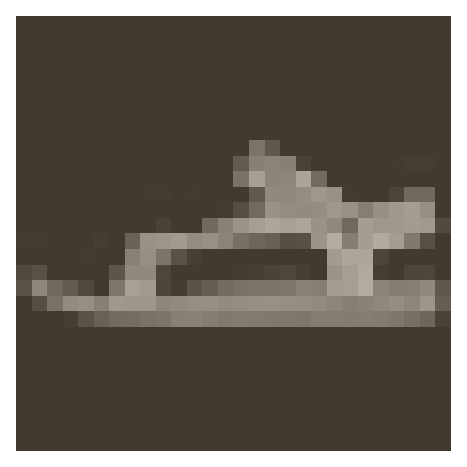

In [6]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [0]:
# Create the network, define the criterion and optimizer

model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.705..  Test Loss: 1.028..  Test Accuracy: 0.601
Epoch: 1/2..  Training Loss: 1.038..  Test Loss: 0.753..  Test Accuracy: 0.724
Epoch: 1/2..  Training Loss: 0.892..  Test Loss: 0.677..  Test Accuracy: 0.740
Epoch: 1/2..  Training Loss: 0.778..  Test Loss: 0.650..  Test Accuracy: 0.752
Epoch: 1/2..  Training Loss: 0.722..  Test Loss: 0.636..  Test Accuracy: 0.757
Epoch: 1/2..  Training Loss: 0.722..  Test Loss: 0.614..  Test Accuracy: 0.768
Epoch: 1/2..  Training Loss: 0.703..  Test Loss: 0.580..  Test Accuracy: 0.780
Epoch: 1/2..  Training Loss: 0.670..  Test Loss: 0.557..  Test Accuracy: 0.795
Epoch: 1/2..  Training Loss: 0.670..  Test Loss: 0.553..  Test Accuracy: 0.798
Epoch: 1/2..  Training Loss: 0.612..  Test Loss: 0.590..  Test Accuracy: 0.784
Epoch: 1/2..  Training Loss: 0.662..  Test Loss: 0.549..  Test Accuracy: 0.799
Epoch: 1/2..  Training Loss: 0.633..  Test Loss: 0.518..  Test Accuracy: 0.808
Epoch: 1/2..  Training Loss: 0.602..  Test Loss: 0.5

In [10]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())
print("The state dict values: \n\n", model.state_dict().values())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])
The state dict values: 

 odict_values([tensor([[ 0.0413, -0.0040,  0.0422,  ..., -0.0160,  0.0254, -0.0012],
        [-0.0023, -0.0489, -0.0195,  ..., -0.0297, -0.0022, -0.0603],
        [-0.0182,  0.0066,  0.0046,  ...,  0.0667, -0.0078,  0.0091],
        ...,
        [ 0.0059,  0.0067,  0.0472,  ..., -0.0338,  0.0138,  0.0549],
        [-0.0009, -0.0195, -0.0191,  ..., -0.0387,  0.0257, -0.0300],
        [ 0.0021, -0.0137,  0.0443,  .

In [0]:
# save model
torch.save(model.state_dict(), 'checkpoint.pth')

In [13]:
# load model
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [14]:
# load model to the network
model.load_state_dict(state_dict)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [15]:
# Try this
model = fc_model.Network(784, 10, [400, 200, 100])
# This will throw an error because the tensor sizes are wrong!
model.load_state_dict(state_dict)

RuntimeError: ignored

In [0]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [0]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [18]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)
